In [ ]:
import cv2
from google.colab.patches import cv2_imshow

from sklearn.feature_extraction import image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction import image

import matplotlib.pyplot as plt
#from pandas.tools.plotting import scatter_matrix
from sklearn import decomposition as dcmp
from sklearn import preprocessing as prep
from sklearn import cluster
import matplotlib.image as mpimg
from sklearn.feature_extraction import image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read Image data

# Patches

In [ ]:
# Use the array data from the first image in this dataset:
def patch_img(p):
  img = cv2.imread("/content/drive/MyDrive/road2.jpg", cv2.IMREAD_GRAYSCALE)
  print('Original Image Shape = ',img.shape)

  patches = image.extract_patches_2d(img, (p,p))
  print('Patches shape: {}'.format(patches.shape))

  X=patches.reshape(patches.shape[0],p*p)

  return X, patches, img

# Clustering and Vector Quantization

# Kmeans

In [ ]:
def Kmeans_funt(X,K):
  km=cluster.KMeans(n_clusters=K)
  km.fit(X)
  ym=km.predict(X)

  return ym, km.labels_,km.cluster_centers_

# Entropy

In [ ]:
#count the occurence of clusters in ym and calculate pi and then calculate entropy H
def entropy(ym,img):
  cluster_number=np.unique(ym)
  occurence=np.zeros(len(cluster_number))
  for k in cluster_number:
    count=0
    for i in range(len(ym)):
      if ym[i]==k:
        count=count+1
    occurence[k]=count

  #probability for every cluster
  prob_cluster=np.zeros(len(cluster_number))
  patch_size=2
  normalize=(img.shape[0]*img.shape[1])/(patch_size*patch_size)
  entropy=0
  for i in range(len(occurence)):
    prob_cluster[i]=occurence[i]/normalize
  
  #ENTROPY
  sum=0
  for m in range(len(prob_cluster)):
    temp=(prob_cluster[m]*(np.log(prob_cluster[m])))
    sum=(sum+temp)
  #sum=-1*sum

  #coding rate
  Coding_rate=sum/(patch_size*patch_size)


  print('Entropy = ', -(sum))
  print('Coding Rate = ' ,-Coding_rate)
    
  return -1*(sum), -1*(Coding_rate)


In [ ]:
def distortion(X, centers, labels,patches, img):
  #Assigning pixel values to the nearest centroid
  compressed_image = centers[labels]
  #compressed_image = np.clip(compressed_image.astype('uint8'), 0, 255)
  compressed_image = compressed_image.reshape(X.shape[0], X.shape[1])

  compressed_image=compressed_image.reshape(patches.shape)

  patch_recon = image.reconstruct_from_patches_2d(compressed_image , img.shape)
  print('Compressed Image Shape =', patch_recon.shape)

  # Distortion 
  D=np.zeros((img.shape[0],img.shape[1]))
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      a=1/(img.shape[0]*img.shape[1])
      D[i,j]= np.square((img[i,j]-patch_recon[i,j]))
  
  print('Distortion = ', np.sum(D)*a)

  return np.sum(D)*a, patch_recon

In [ ]:
D=[] # Distortion 
E=[] # Entropy 
C=[] # Coding Rate

cluster_k=[]

# Changing P(Patch size) and Keeping R(Rate) constant




# Variables

In [ ]:
p=2
r=1.0

K= np.power(2, int(np.floor(r*(p*p)) ))
print(K)


cluster_k.append(K)

16


In [ ]:
cluster_k

[2, 4, 8, 16]

# Calling Functions

In [ ]:
X, patches, img= patch_img(p)

ym, labels, centers=Kmeans_funt(X,K)

sum, Coding_rate= entropy(ym,img)
E.append(sum)
C.append(Coding_rate)

dis, patch_recon = distortion(X, centers, labels,patches, img)
D.append(dis)

Original Image Shape =  (2048, 2048)
Patches shape: (4190209, 2, 2)
Entropy =  4.8895207736958435
Coding Rate =  1.2223801934239609
Compressed Image Shape = (2048, 2048)
Distortion =  38.768708880379386


In [ ]:
D,E,C

([628.692366036052, 180.53937471785454, 68.59322516092502, 38.768708880379386],
 [-2.974459008680018,
  -0.44755978291101806,
  2.4130443392262886,
  4.8895207736958435],
 [-0.7436147521700045,
  -0.11188994572775451,
  0.6032610848065721,
  1.2223801934239609])

In [ ]:
import pandas as pd
df=pd.DataFrame({'Rate':[0.4,0.6,0.8,1],
                 'Distortion':D[0:4],
                 'Entropy': E[0:4],
                 'Coding Rate':C[0:4]})

In [ ]:
df1=pd.DataFrame({'Patch':[2,2,2,2,4,4],
                 'Rate':[0.4,0.6,0.8,1,0.2,0.1],
                 'Distortion':D,
                 'Entropy': E,
                 'Coding Rate':C})

In [ ]:
df1

,Patch,Rate,Distortion,Entropy,Coding Rate
0,2,0.4,628.692366,-2.974459,-0.743615
1,2,0.6,181.198674,-0.456923,-0.114231
2,2,0.8,68.812859,2.407483,0.601871
3,2,1.0,37.965840,5.106644,1.276661
4,4,0.2,141.238572,2.379829,0.594957
5,4,0.1,661.390084,-2.961386,-0.740346


# Plotting Compressed and Original Image

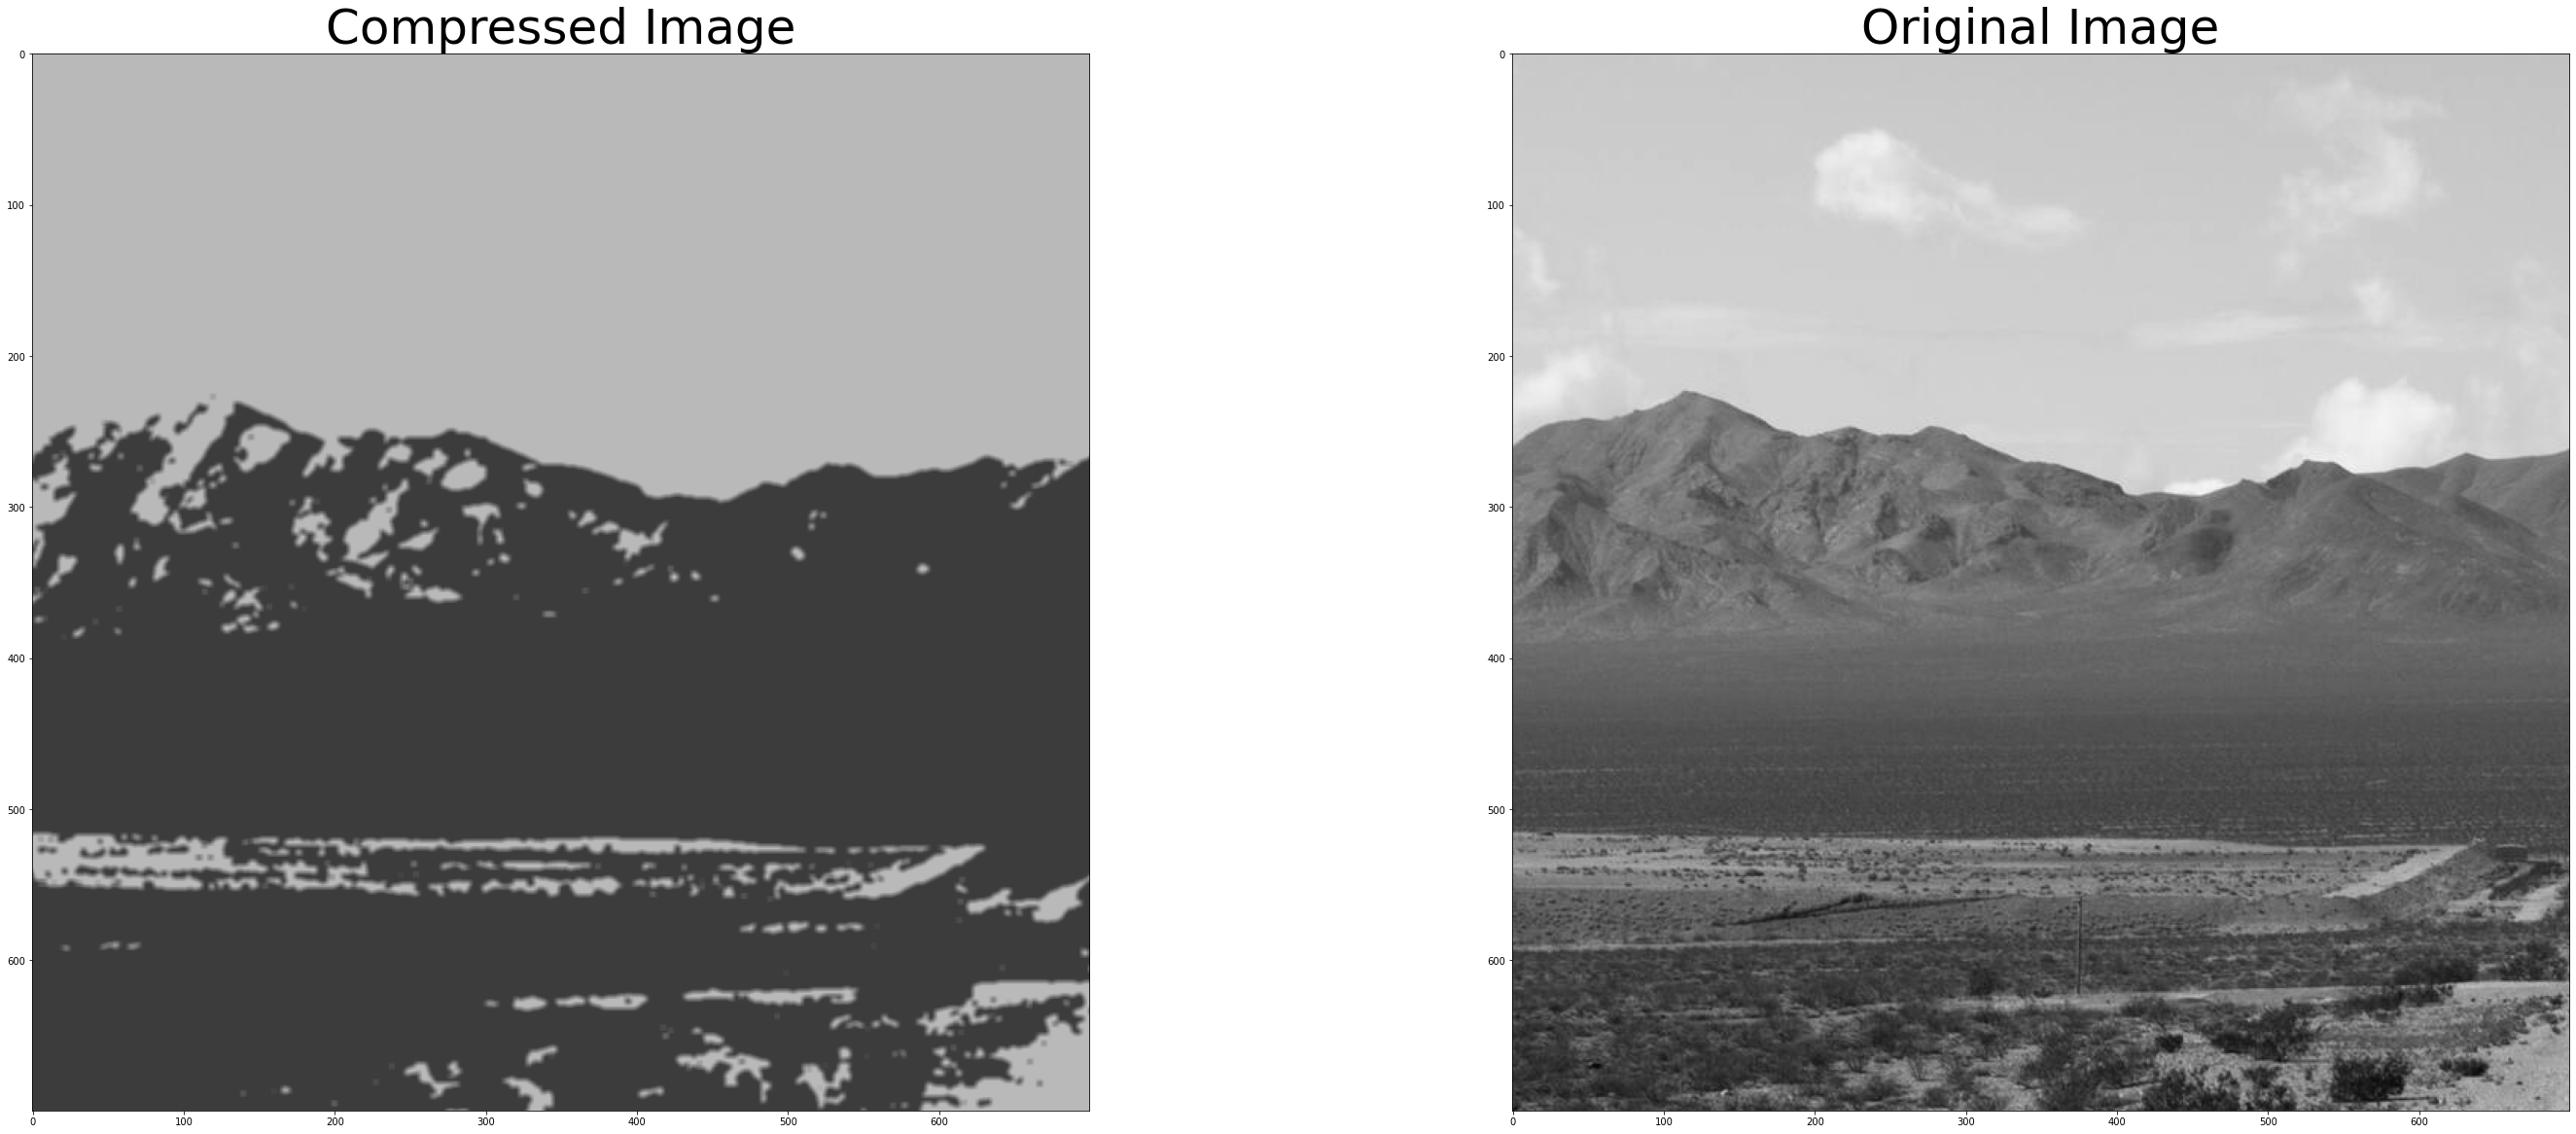

In [ ]:
f, axarr = plt.subplots(1,2)
plt.rcParams["figure.figsize"] = (50,20)

axarr[0].imshow(patch_recon[200:900,200:900],cmap='gray', vmin=0, vmax=255)
axarr[1].imshow(img[200:900,200:900], cmap='gray', vmin=0, vmax=255)

axarr[0].set_title('Compressed Image', fontsize = 50.0)
axarr[1].set_title('Original Image', fontsize = 50.0)

plt.show()

In [ ]:
f.savefig('/content/drive/MyDrive/img_r1_p4.jpeg')


# PLOT: Rate Vs Distortion

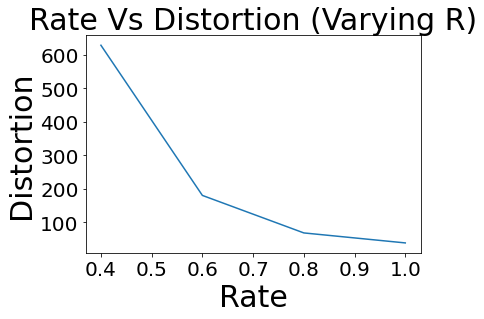

In [ ]:
R=[0.4,0.6,0.8,1]
plt.plot(R, D)
plt.title('Rate Vs Distortion (Varying R)', fontsize = 30.0)
plt.xlabel('Rate', fontsize = 30.0)
plt.ylabel('Distortion', fontsize = 30.0)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()